In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/Users/jamesliao2018/Logs/kaggle_data/competitive-data-science-predict-future-sales/sales_train.csv')

In [3]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
# df_train.shop_id.value_counts()

In [6]:
df_train.item_price.describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [7]:
df_train.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [11]:
df_train_group = df_train.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean','item_cnt_day':'sum'}).reset_index()

In [12]:
df_train_group.head()

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,0,30,1,265.0,31.0
1,0,31,1,434.0,11.0
2,0,32,0,221.0,6.0
3,0,32,1,221.0,10.0
4,0,33,0,347.0,3.0


In [16]:
df_train_group.item_id.nunique()

21807

In [20]:
df_month_sales = df_train_group.groupby('date_block_num').item_cnt_day.sum().reset_index()

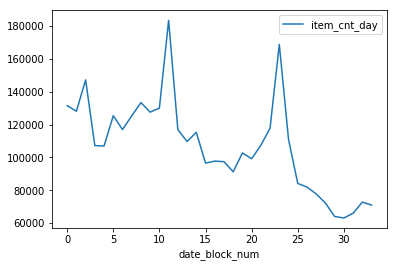

In [23]:
df_month_sales.plot(x='date_block_num',y='item_cnt_day')

In [24]:
df_item_group = df_train.groupby(['item_id','date_block_num']).agg({'item_price':'mean','item_cnt_day':'mean'}).reset_index()

In [25]:
df_item_group_month = df_item_group.groupby('date_block_num').mean().reset_index()

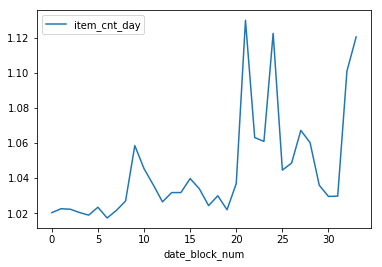

In [26]:
df_item_group_month.plot(x='date_block_num',y='item_cnt_day')

In [28]:
df_item_group_num = df_train.groupby(['date_block_num']).item_id.nunique().reset_index()

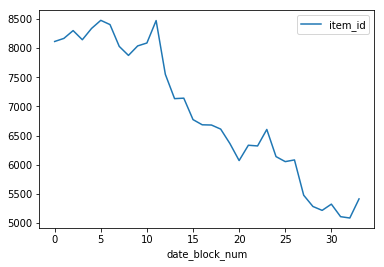

In [29]:
df_item_group_num.plot(x='date_block_num',y='item_id')

In [32]:
df_item_period = df_train.groupby(['item_id']).date_block_num.nunique().reset_index()

In [33]:
df_item_period.head()

,item_id,date_block_num
0,0,1
1,1,5
2,2,2
3,3,2
4,4,1


In [34]:
df_train_sample = df_train[df_train.item_id==1]

In [35]:
df_train_sample = df_train_sample.groupby('date_block_num').sum().reset_index()

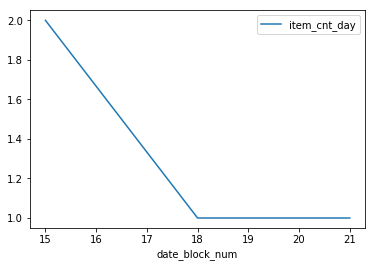

In [36]:
df_train_sample.plot(x='date_block_num',y='item_cnt_day')

In [39]:
# revenue / GMV
df_train['gmv']=df_train['item_cnt_day']*df_train['item_price']

In [40]:
df_gmv_group = df_train.groupby('date_block_num').gmv.sum().reset_index()

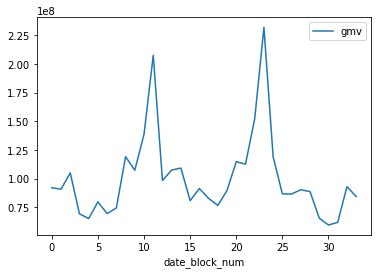

In [41]:
df_gmv_group.plot(x='date_block_num',y='gmv')

In [42]:
df_train['period2']=df_train['date_block_num']%12

In [43]:
df_group_period2 = df_train.groupby(['shop_id','item_id','period2','date_block_num']).item_cnt_day.sum().reset_index()

In [44]:
df_group_period2_mean = df_group_period2.groupby(['shop_id','item_id','period2']).item_cnt_day.mean().reset_index()

In [45]:
df_group_period2_mean.head()

,shop_id,item_id,period2,item_cnt_day
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0


In [46]:
df_group_period2_mean_select = df_group_period2_mean[df_group_period2_mean.period2==10]

In [47]:
df_group_period2_mean_select.head()

,shop_id,item_id,period2,item_cnt_day
8127,2,33,10,2.0
8138,2,97,10,1.0
8166,2,482,10,2.0
8190,2,486,10,2.0
8198,2,491,10,1.0


In [52]:
df_group_month = df_group_period2.groupby(['shop_id','item_id','date_block_num']).item_cnt_day.sum().reset_index()

In [53]:
df_group_month = df_group_month.sort_values(['shop_id','item_id','date_block_num'])

In [54]:
df_group_month = df_group_month[df_group_month.date_block_num==33]

In [55]:
df_group_month.head()

,shop_id,item_id,date_block_num,item_cnt_day
8113,2,31,33,1.0
8205,2,486,33,3.0
8254,2,787,33,1.0
8284,2,794,33,1.0
8367,2,968,33,1.0


In [13]:
df_item = pd.read_csv('/Users/jamesliao2018/Logs/kaggle_data/competitive-data-science-predict-future-sales/items.csv')

In [14]:
df_item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [27]:
df_item.item_category_id.nunique()

84

In [15]:
df_item.item_id.nunique()

22170

In [17]:
df_test = pd.read_csv('/Users/jamesliao2018/Logs/kaggle_data/competitive-data-science-predict-future-sales/test.csv')

In [18]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [19]:
df_test.item_id.nunique()

5100

In [56]:
df_final = df_test.merge(df_group_period2_mean_select,\
                        on=['shop_id','item_id'],how='left')

In [57]:
df_final.head()

,ID,shop_id,item_id,period2,item_cnt_day
0,0,5,5037,10.0,1.0
1,1,5,5320,NaN,NaN
2,2,5,5233,NaN,NaN
3,3,5,5232,NaN,NaN
4,4,5,5268,NaN,NaN


In [58]:
df_final = df_final.rename(columns={'item_cnt_day':'q1'})

In [59]:
df_final = df_final.merge(df_group_month,\
                         on=['shop_id','item_id'],how='left')

In [60]:
df_final.head()

,ID,shop_id,item_id,period2,q1,date_block_num,item_cnt_day
0,0,5,5037,10.0,1.0,NaN,NaN
1,1,5,5320,NaN,NaN,NaN,NaN
2,2,5,5233,NaN,NaN,33.0,1.0
3,3,5,5232,NaN,NaN,NaN,NaN
4,4,5,5268,NaN,NaN,NaN,NaN


In [61]:
df_final = df_final.rename(columns={'item_cnt_day':'q2'})

In [62]:
df_final.head()

,ID,shop_id,item_id,period2,q1,date_block_num,q2
0,0,5,5037,10.0,1.0,NaN,NaN
1,1,5,5320,NaN,NaN,NaN,NaN
2,2,5,5233,NaN,NaN,33.0,1.0
3,3,5,5232,NaN,NaN,NaN,NaN
4,4,5,5268,NaN,NaN,NaN,NaN


In [94]:
df_final[(~df_final.q1.isnull())&(~df_final.q2.isnull())].head()

,ID,shop_id,item_id,period2,q1,date_block_num,q2,item_cnt_month
10,10,5,4806,10.0,2.0,33.0,3.0,2.5
14,14,5,4870,10.0,6.0,33.0,2.0,4.0
15,15,5,4872,10.0,5.0,33.0,6.0,5.5
20,20,5,4717,10.0,1.0,33.0,1.0,1.0
22,22,5,5823,10.0,5.0,33.0,1.0,3.0


In [96]:
df_final.loc[(~df_final.q1.isnull())&(~df_final.q2.isnull()),'item_cnt_month'] = \
df_final.loc[(~df_final.q1.isnull())&(~df_final.q2.isnull()),'q1']*0.2\
+df_final.loc[(~df_final.q1.isnull())&(~df_final.q2.isnull()),'q2']*0.8

In [97]:
df_final.loc[(df_final.q1.isnull())&(~df_final.q2.isnull()),'item_cnt_month'] = df_final.loc[(df_final.q1.isnull())&(~df_final.q2.isnull()),'q2']

In [98]:
df_final.loc[(~df_final.q1.isnull())&(df_final.q2.isnull()),'item_cnt_month'] = df_final.loc[(~df_final.q1.isnull())&(df_final.q2.isnull()),'q1']

In [99]:
df_final.loc[(df_final.q1.isnull())&(df_final.q2.isnull()),'item_cnt_month'] = 0

In [100]:
df_final.head()

,ID,shop_id,item_id,period2,q1,date_block_num,q2,item_cnt_month
0,0,5,5037,10.0,1.0,NaN,NaN,1.0
1,1,5,5320,NaN,NaN,NaN,NaN,0.0
2,2,5,5233,NaN,NaN,33.0,1.0,1.0
3,3,5,5232,NaN,NaN,NaN,NaN,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,0.0


In [101]:
df_final[(df_final.q1.isnull())&(~df_final.q2.isnull())].head()

,ID,shop_id,item_id,period2,q1,date_block_num,q2,item_cnt_month
2,2,5,5233,NaN,NaN,33.0,1.0,1.0
5,5,5,5039,NaN,NaN,33.0,1.0,1.0
6,6,5,5041,NaN,NaN,33.0,2.0,2.0
18,18,5,4892,NaN,NaN,33.0,2.0,2.0
24,24,5,5900,NaN,NaN,33.0,3.0,3.0


In [102]:
df_final[['ID','item_cnt_month']].to_csv('submission_past_months_0605.csv',index=False)